### Setup

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import urllib2
from __future__ import division

np.random.seed(1)
url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:] # don't want first row (labels)

# chopping data based on thresholds on x and y coordinates
x_bounds = (409, 3529)
y_bounds = (1564, 3124)

def check_in_bounds(row, x_bounds, y_bounds):
    if row[0] < x_bounds[0] or row[0] > x_bounds[1]:
        return False
    if row[1] < y_bounds[0] or row[1] > y_bounds[1]:
        return False
    if row[3] == 0:
        return False

    return True

indices_in_bound, = np.where(np.apply_along_axis(check_in_bounds, 1, csv, x_bounds, y_bounds))
data_thresholded = csv[indices_in_bound]
n = data_thresholded.shape[0]
data = data_thresholded
data[:, -2] = data[:,-1]/data[:,-2]
data = data[:, :-1]
print data[:, -1]
# normalize  density so they're not super tiny values
data[:, -1] -= np.average(data[:, -1])
data[:, -1] /= np.std(data[:, -1])
print data[:, -1]

[ 0.00152724  0.00160285  0.00162364 ...,  0.00092469  0.00060045
  0.00093872]
[ 0.92781019  1.11377747  1.1649147  ..., -0.55424367 -1.35176376
 -0.51974171]


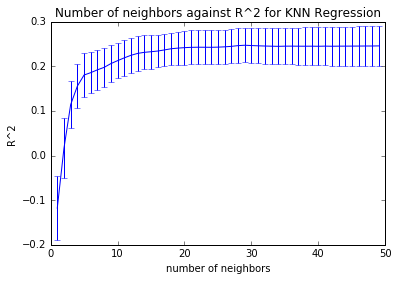

mean r^2 maximized at:  29
variance minimized at:  18


In [7]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn import cross_validation

X = data[:, (0, 1, 2)]
Y = data[:, -1]

n_neighbors = np.arange(1, 50)
r2 = []
for n in n_neighbors:
    reg = KNN(n_neighbors=n, algorithm='auto', weights='distance')
    scores = cross_validation.cross_val_score(reg, X, Y, scoring='r2', cv=10)
    r2.append(np.array([scores.mean(), scores.std()]))
r2 = np.array(r2)

plt.errorbar(n_neighbors, r2[:,0], yerr = r2[:,1])
plt.title("Number of neighbors against R^2 for KNN Regression")
plt.xlabel("number of neighbors")
plt.ylabel("R^2")
plt.show()
print "mean r^2 maximized at: ", np.argmax(r2[:,0])+1
print "variance minimized at: ", np.argmin(r2[:,1])+1

In [ ]:
from sklearn.ensemble import RandomForestRegressor as RF

depth = np.arange(1, 20)
r2 = []
for d in depth:
    reg = RF(max_depth=d, max_features=1)
    scores = cross_validation.cross_val_score(reg, X, Y, scoring='r2', cv=10)
    r2.append(np.array([scores.mean(), scores.std()]))
r2 = np.array(r2)

plt.errorbar(depth, r2[:,0], yerr = r2[:,1])
plt.title("Max depth against R^2 for RandomForestRegression")
plt.xlabel("Max depth")
plt.ylabel("R^2")
plt.show()
print "mean r^2 maximized at: ", np.argmax(r2[:,0])+1
print "variance minimized at: ", np.argmin(r2[:,1])+1

In [ ]:
features = np.arange(1, 4)
r2 = []
for f in features:
    reg = RF(max_depth=10, max_features=f)
    scores = cross_validation.cross_val_score(reg, X, Y, scoring='r2', cv=10)
    r2.append(np.array([scores.mean(), scores.std()]))
    print("R^2 of %s: %0.2f (+/- %0.2f)" % ('RF', scores.mean(), scores.std() * 2))
r2 = np.array(r2)

In [2]:
np.random.seed(1)
url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:] # don't want first row (labels)

# chopping data based on thresholds on x and y coordinates
x_bounds = (409, 3529)
y_bounds = (1564, 3124)

def check_in_bounds(row, x_bounds, y_bounds):
    if row[0] < x_bounds[0] or row[0] > x_bounds[1]:
        return False
    if row[1] < y_bounds[0] or row[1] > y_bounds[1]:
        return False
    if row[3] == 0:
        return False

    return True

indices_in_bound, = np.where(np.apply_along_axis(check_in_bounds, 1, csv, x_bounds, y_bounds))
data_thresholded = csv[indices_in_bound]
n = data_thresholded.shape[0]
data = data_thresholded

KeyboardInterrupt: 

In [ ]:
data[:, -2] = data[:,-1]/data[:,-2]
data = data[:, :-1]
print data[:, -1]
# normalize  density so they're not super tiny values
data[:, -1] -= np.average(data[:, -1])
data[:, -1] /= np.std(data[:, -1])
print data[:, -1]

In [5]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn import cross_validation

X = data[:, (0, 1, 2)]
Y = data[:, -1]

reg = KNN(n_neighbors=30, algorithm='auto', weights='distance')
scores = cross_validation.cross_val_score(reg, X, Y, scoring='r2', cv=10)
print scores.mean(), scores.std()

0.246363144547 0.0390236491997
